# Introduction

this notebook is the first and introduction towards MileApp Online Assessment that is work on by myself (Abdullah Hadi). There will be 3 main ipynb notebooks that handle the data given for this assessment. The first notebook is this notebook, in this notebook we try to understand the data more and try to find some insight using data visualization, the second notebook is about preprocessing our data to make it more suitable for machine learning use, and the third notebook is about implementing a machine learning solution using the given data.

There is also a Tableau File that holds a visualization of a Map using the longitude and latitude from the data. In the tableau file there will be some visualization that is similar towards the visualization that is presented in this notebook, but non the less i will use the visualization generated by this notebook except for the Map visualization.

All of the process of my work will also be supported with a presentation slide in PDF file format, the content of the slide will be similar to the content of these notebooks except.

That is all for the introduction, next you can read the next part of this notebook and so on.

# EDA - Analyzing the data

# Import Library and Data

Here we will import the data and library that has been given, and also some adjustment to our libraries

In [2]:
import pandas as pd
import numpy as np
import json

pd.set_option('display.max_columns', None)

# for printing data more prettier
# https://docs.python.org/3/library/pprint.html
from pprint import pprint

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.dpi'] = 100

we will be using a library called pandas profiling to speed up EDA, the cell below is a command to install the library

In [4]:
# ! pip install -U ydata-profiling

In [5]:
from ydata_profiling import ProfileReport

finally we open the data, the data given is a json file so we will use the json library built in python

In [6]:
SAMPLE_DATA_PATH = "data/data-sample.json"

with open(SAMPLE_DATA_PATH, 'r') as f:
  data_json = json.load(f)

print("The data on index 0:")
pprint(data_json[0])

The data on index 0:
{'UserVar': {'branch_dest': 'SRG',
             'branch_origin': 'CGK',
             'receiver_city': 'BATANG ,KAB BATANG',
             'taskDetailStatus': 'D01',
             'taskDetailStatusLabel': 'YANG BERSANGKUTAN',
             'taskStatus': 'COLF01',
             'taskStatusLabel': 'Success',
             'weight': '13'},
 'cod': {'amount': 685000, 'received': True},
 'flow': 'Delivery',
 'taskAssignedTo': 'pacifiedLion0',
 'taskCompletedTime': '2022-11-01 20:46:30 +0700',
 'taskCreatedTime': '2022-11-01 20:17:26 +0700',
 'taskId': '4fe3b237c832ca4841a2',
 'taskLocationDone': {'lat': -6.9266078, 'lon': 109.7629103},
 'taskStatus': 'done'}


we then turn the data into a pandas dataframe and also flatten the json data, using a pandas function called json_normalize. the results can be seen, data like UserVar which has another nested dictionary/json inside it are flatten

In [7]:
# flatten nested json as a dataframe
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.json_normalize.html
df = pd.json_normalize(data_json)
df.head()

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus
0,2022-11-01 20:17:26 +0700,pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK,COLF01
1,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK,COLF01
2,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01
3,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01
4,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562.0,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01


# Simple EDA using Pandas Profiling

now we will use the pandas profiling library to do a simple EDA on the data, there will be a written short summarization regarding any interesting thing or insight about the overview report generated by pandas profiling

In [8]:
profile = ProfileReport(df,title='Delivery Data Overview')
profile

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


In [9]:
profile.to_file('DeliveryDataOverview.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 104.73it/s]


## Summarization

- first there is 8334 row and 18 columns with about 11.8% of the data has missing values
- taskStatus only have two values, done and ongoing, and there is no missing value for this column
- flow column only has 1 value across all the row, which is delivery
- taskLocationDone.lon and lat has a lot of zero values, there is 2451 rows with 0 values, and both of them has 768 missing values
- cod.amount 5986 missing values but no zero values, and the distribution is right skewed, also the minimum value is 837 and the maximum is 4,730,000
- cod.received is a boolean type, so there is only true or false value, and has the same amount of missing values as cod.amount

the next points will cover around the UserVar data
- branch_dest has 62 values, the values seems to be area code, no missing value for this column
- taskStatusLabel has only two value which is success and failed, it has 762 missing values
- receiver_city has 1830, the value is about cities name, and it has 52 missing value
- taskDetailStatusLabel values are about delivery problem and also about who accepted the delivery, same amount of missing value as taskStatusLabel, column with similar amount of missing values are assume to be connected in a way
- taskDetailStatus has the same amount of distinct value as taskDetailStatusLabel, then could be the code only for the taskDetailStatusLabel column
-  weight column is right skewed, minimum value for it is 0 and maximum is 202.5, the mean is 2.4~
- branch_origin is similar to branch_dest, except it has less distinct value, it only has 59 and 293 missing value
- taskStatus is basically taskStatusLabel except it values is coded

#  Time diff

since we have a stert time when a task is created and a time when the task is completed, we can get a single number of time that shows how long for a certain task to be completed. this time difference of calculating teskCompletedTime minus taskCreatedTime will be a good feature to analyze.

Beside being a good feature the machine learing solution for this data will be to predict how long would a task be completed in minutes, so we will create this feature to be in minutes

first we check what is the data type, if its a string then we will change it to a datetime

In [10]:
type(df['taskCreatedTime'][0])

str

In [11]:
type(df['taskCompletedTime'][0])

str

In [12]:
df['taskCreatedTime'] = pd.to_datetime(df['taskCreatedTime'],utc=True)

In [13]:
df['taskCompletedTime'] = pd.to_datetime(df['taskCompletedTime'],utc=True)

after changing it, we then calculate the difference

In [14]:
df['timeDiff'] = df['taskCompletedTime'] - df['taskCreatedTime']

In [15]:
df['timeDiff'].describe()

count                         7566
mean     0 days 01:12:50.355802273
std      0 days 01:40:52.779119213
min                0 days 00:00:15
25%         0 days 00:09:59.750000
50%         0 days 00:37:15.500000
75%         0 days 01:22:07.250000
max                0 days 13:16:00
Name: timeDiff, dtype: object

we then change it a float data type that represent in minutes with the following code below

In [16]:
df['timeDiffMinutes'] = df['timeDiff'].dt.total_seconds() / 60

In [17]:
df['timeDiffMinutes']

0        29.066667
1       232.683333
2       300.833333
3       577.200000
4       130.700000
           ...    
8329     30.866667
8330     16.166667
8331      1.183333
8332    132.216667
8333    111.616667
Name: timeDiffMinutes, Length: 8334, dtype: float64

In [18]:
df['timeDiffMinutes'].describe()

count    7566.000000
mean       72.839263
std       100.879652
min         0.250000
25%         9.995833
50%        37.258333
75%        82.120833
max       796.000000
Name: timeDiffMinutes, dtype: float64

then we try to plot a histogram of it. the distribution seems to be right skewed

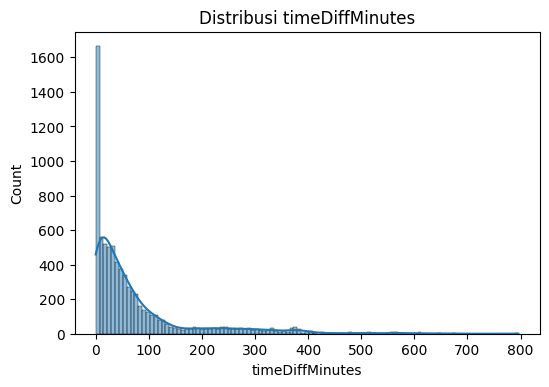

In [19]:
sns.histplot(x=df['timeDiffMinutes'], kde=True)
plt.title("Distribusi timeDiffMinutes")
plt.ticklabel_format(style='plain', axis='both')
plt.show()

lets try to show only the time that is under 20 to see the bins bigger

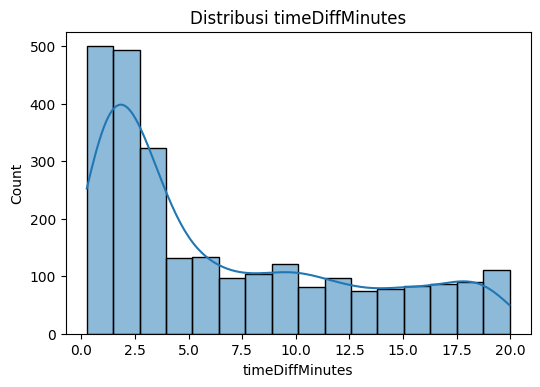

In [20]:
sns.histplot(x=df[df['timeDiffMinutes'] < 20 ]['timeDiffMinutes'], kde=True)
plt.title("Distribusi timeDiffMinutes")
plt.ticklabel_format(style='plain', axis='both')
plt.show()

and see it over 20 minutes for another perspective

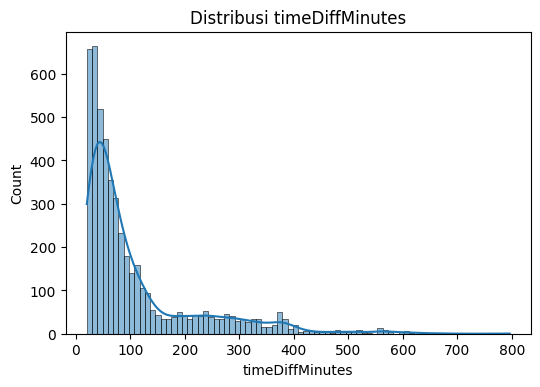

In [21]:
sns.histplot(x=df[df['timeDiffMinutes'] > 20 ]['timeDiffMinutes'], kde=True)
plt.title("Distribusi timeDiffMinutes")
plt.ticklabel_format(style='plain', axis='both')
plt.show()

we can use timeDiffMinutes to further analyze our date more easily, and we will do that in the next section below

# Analyzing More

here we try to dig dipper on the data, and try to find more interesting connection, knowledge, and insight about our data

## Seeing Null Values on data

we will see the missing/null value on our data deeper, we are hoping to find out why the data is null so we can possibly fill the missing values, we will look for pattern like a frequent value that occur or pattern by viewing on other column that is not null/missing. we will also  view them in two part, by viewing them base on the taskStatus value

as you can see the table below the data for ongoing task status has a lot of null/nan values

In [22]:
df[df["taskStatus"] == 'ongoing'].head()

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus,timeDiff,timeDiffMinutes
680,2022-11-02 01:06:34+00:00,vengefulCheese4,NaT,ongoing,Delivery,0bed2d5cd82456af0239,NaN,NaN,NaN,NaN,MES,NaN,"DOLOK PANRIBUAN,SIMA",NaN,NaN,1,CGK,NaN,NaT,NaN
684,2022-11-02 01:06:34+00:00,vengefulCheese4,NaT,ongoing,Delivery,3e9117e0d978e79e02e9,NaN,NaN,NaN,NaN,MES,NaN,"SIANTAR TIMUR,PEMATA",NaN,NaN,1,MES,NaN,NaT,NaN
685,2022-11-02 01:06:34+00:00,vengefulCheese4,NaT,ongoing,Delivery,898eb4f04d5eb328ed94,NaN,NaN,550000.0,False,MES,NaN,"SIANTAR TIMUR,PEMATA",NaN,NaN,1,SOC,NaN,NaT,NaN
686,2022-11-02 01:06:34+00:00,vengefulCheese4,NaT,ongoing,Delivery,eafd37c5536bc45e5a43,NaN,NaN,NaN,NaN,MES,NaN,"SIANTAR TIMUR,PEMATA",NaN,NaN,1,MES,NaN,NaT,NaN
687,2022-11-02 01:06:34+00:00,vengefulCheese4,NaT,ongoing,Delivery,d59413b44eb9878eca66,NaN,NaN,NaN,NaN,MES,NaN,"SIANTAR BARAT,PEMATA",NaN,NaN,1,PDG,NaN,NaT,NaN


we can calculate how many null value on each column with the code below

In [23]:
df[df["taskStatus"] == 'ongoing'].isna().sum()

taskCreatedTime                    0
taskAssignedTo                     1
taskCompletedTime                762
taskStatus                         0
flow                               0
taskId                             0
taskLocationDone.lon             762
taskLocationDone.lat             762
cod.amount                       378
cod.received                     378
UserVar.branch_dest                0
UserVar.taskStatusLabel          762
UserVar.receiver_city              6
UserVar.taskDetailStatusLabel    762
UserVar.taskDetailStatus         762
UserVar.weight                     0
UserVar.branch_origin             14
UserVar.taskStatus               762
timeDiff                         762
timeDiffMinutes                  762
dtype: int64

if we thing data that the status is still ongoing will generate the missing data after the task is done (completed) then it is still quite reasonable for those task who are ongoing have to nan values, because is related to the overall system of your company

now wew ill look at data that taskStatus is done

In [24]:
df[df["taskStatus"] == 'done'].isna().sum()

taskCreatedTime                     0
taskAssignedTo                      0
taskCompletedTime                   6
taskStatus                          0
flow                                0
taskId                              0
taskLocationDone.lon                6
taskLocationDone.lat                6
cod.amount                       5598
cod.received                     5598
UserVar.branch_dest                 0
UserVar.taskStatusLabel             0
UserVar.receiver_city              46
UserVar.taskDetailStatusLabel       0
UserVar.taskDetailStatus            0
UserVar.weight                      0
UserVar.branch_origin             279
UserVar.taskStatus                  0
timeDiff                            6
timeDiffMinutes                     6
dtype: int64

COD data has the most missing values, here it will be assumed that NAN-valued COD is delivery without COD service, we can handle this by filling a value like "NO COD"

The other columns do not have as many missing values as the cod column, but we will still look at those missing data

### Looking at data null cod

first lets see the distribution of the data as well as the statistical value for the cod.amount column again before we fill it with zero

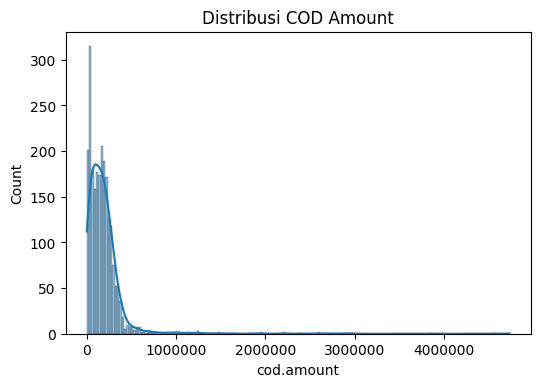

In [25]:
sns.histplot(x=df['cod.amount'], kde=True)
plt.title("Distribusi COD Amount")
plt.ticklabel_format(style='plain', axis='both')
plt.show()

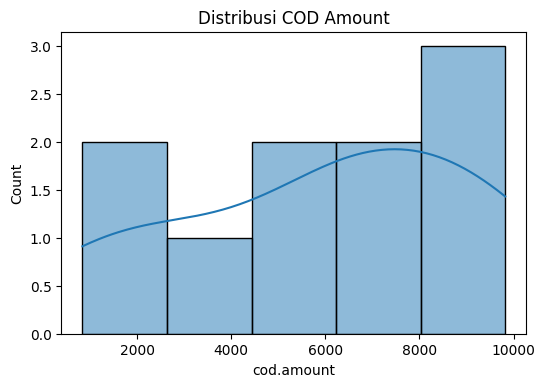

In [26]:
sns.histplot(x=df[df['cod.amount'] < 10_000]['cod.amount'], kde=True)
plt.title("Distribusi COD Amount")
plt.ticklabel_format(style='plain', axis='both')
plt.show()

In [27]:
df['cod.amount'].describe()

count    2.358000e+03
mean     1.911411e+05
std      2.723770e+05
min      8.370000e+02
25%      6.100000e+04
50%      1.533750e+05
75%      2.350000e+05
max      4.730000e+06
Name: cod.amount, dtype: float64

In [28]:
df[df["cod.received"].isna()].head()

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus,timeDiff,timeDiffMinutes
73,2022-11-01 02:31:32+00:00,enragedLlama3,2022-11-01 06:14:31+00:00,done,Delivery,b7f9f3f96def6b866166,98.814915,1.713917,NaN,NaN,DTB,Success,"SARUDIK,TAPANULI TEN",YANG BERSANGKUTAN,D01,1,MES,COLF01,0 days 03:42:59,222.983333
550,2022-11-01 08:04:06+00:00,mildCardinal0,NaT,done,Delivery,9779ae5b5f88ba0bf31c,NaN,NaN,NaN,NaN,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,3,CGK,COLF01,NaT,NaN
551,2022-11-01 09:59:58+00:00,mildCardinal0,NaT,done,Delivery,8ade827b1e3530c02e82,NaN,NaN,NaN,NaN,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,4.9,CGK,COLF01,NaT,NaN
552,2022-11-01 09:59:58+00:00,mildCardinal0,NaT,done,Delivery,292b1e9f73099dac1209,NaN,NaN,NaN,NaN,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,8,CGK,COLF01,NaT,NaN
553,2022-11-01 09:59:58+00:00,mildCardinal0,NaT,done,Delivery,7e8862b3f4010465f006,NaN,NaN,NaN,NaN,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,17,BDO,COLF01,NaT,NaN


ok since there no 0 value then we can implement our plan before to fill nan cod amount with zero as well create a feature to determine if the a task is using cod or not by using the value 1 for using cod service and 0 for not using it

In [29]:
df['cod.amount'].fillna(0, inplace=True)

In [30]:
df['cod.received'].fillna("NO COD", inplace=True)

In [31]:
df['isCOD'] = np.zeros(df.shape[0], dtype=int)

In [32]:
df.loc[df['cod.amount'] > 0, 'isCOD'] = 1

<Axes: xlabel='isCOD', ylabel='count'>

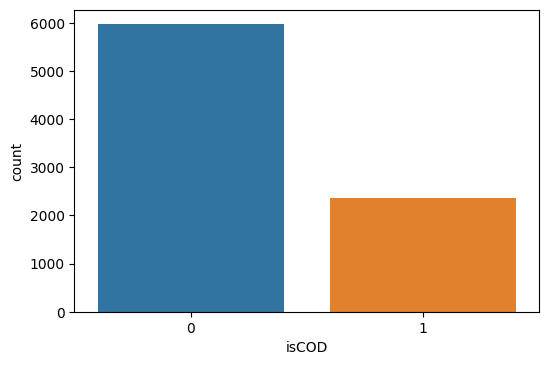

In [33]:
sns.countplot(x=df['isCOD'])

In [34]:
df['isCOD'].value_counts()

0    5976
1    2358
Name: isCOD, dtype: int64

<Axes: xlabel='cod.received', ylabel='count'>

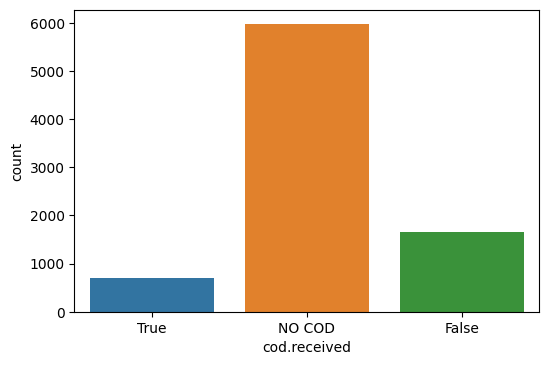

In [35]:
sns.countplot(x=df['cod.received'])

we will also check (just to make sure) if there is a condition where the cod amount is zero but there is value in cod.reveived that is not "NO COD"

In [36]:
df.groupby(['isCOD',"cod.received"])[['cod.amount']].min()

cod.amount
isCOD cod.received            
0     NO COD               0.0
1     False             2955.0
      True               837.0

as we can see from the groupby result above there is none that meet the condition i worried about

with filling cod's data column and creating another column to determine if a task is using COD or not, we have minimize the number of null values in our dataset

In [37]:
df[df["taskStatus"] == 'done'].isna().sum()

taskCreatedTime                    0
taskAssignedTo                     0
taskCompletedTime                  6
taskStatus                         0
flow                               0
taskId                             0
taskLocationDone.lon               6
taskLocationDone.lat               6
cod.amount                         0
cod.received                       0
UserVar.branch_dest                0
UserVar.taskStatusLabel            0
UserVar.receiver_city             46
UserVar.taskDetailStatusLabel      0
UserVar.taskDetailStatus           0
UserVar.weight                     0
UserVar.branch_origin            279
UserVar.taskStatus                 0
timeDiff                           6
timeDiffMinutes                    6
isCOD                              0
dtype: int64

In [38]:
df[df["taskStatus"] == 'ongoing'].isna().sum()

taskCreatedTime                    0
taskAssignedTo                     1
taskCompletedTime                762
taskStatus                         0
flow                               0
taskId                             0
taskLocationDone.lon             762
taskLocationDone.lat             762
cod.amount                         0
cod.received                       0
UserVar.branch_dest                0
UserVar.taskStatusLabel          762
UserVar.receiver_city              6
UserVar.taskDetailStatusLabel    762
UserVar.taskDetailStatus         762
UserVar.weight                     0
UserVar.branch_origin             14
UserVar.taskStatus               762
timeDiff                         762
timeDiffMinutes                  762
isCOD                              0
dtype: int64

### Looking at data null branch origin

branch origin has also have some missing value, we will try to see the data where branch origin is missing, and will write more if there is some information to it

In [39]:
df[df['UserVar.branch_origin'].isna()].head()

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus,timeDiff,timeDiffMinutes,isCOD
11,2022-11-01 02:13:16+00:00,giddyCockatoo1,2022-11-01 08:39:01+00:00,done,Delivery,dcaeb71079c4d71f6008,109.780323,-7.663731,148000.0,True,MGL,Success,"BUTUH,PURWOREJO",YANG BERSANGKUTAN,D01,1,None,COLF01,0 days 06:25:45,385.750000,1
243,2022-11-01 09:09:43+00:00,dreadfulDinosaur9,2022-11-01 09:10:49+00:00,done,Delivery,9acb3d268b1169a5c6b6,100.143461,-0.621138,111000.0,True,PDG,Success,"BATANG ANAI,PARIAMAN",YANG BERSANGKUTAN,D01,10,None,COLF01,0 days 00:01:06,1.100000,1
314,2022-11-01 02:16:59+00:00,jealousLemur3,2022-11-01 03:51:20+00:00,done,Delivery,3447ea4a5c533bcbaa7b,112.166078,-8.093178,23000.0,True,MXG,Success,"KEPANJENKIDUL,BLITAR",YANG BERSANGKUTAN,D01,1,None,COLF01,0 days 01:34:21,94.350000,1
332,2022-11-01 11:35:17+00:00,finickyWasp0,2022-11-01 11:36:08+00:00,done,Delivery,d927638d08febd1d77de,97.820019,0.563888,46000.0,True,DTB,Success,"TELUK DALAM,KAB.NIAS",YANG BERSANGKUTAN,D01,1,None,COLF01,0 days 00:00:51,0.850000,1
415,2022-11-01 04:21:12+00:00,pacifiedChowder4,2022-11-01 06:46:25+00:00,done,Delivery,8bace4a1c45648ef94e0,100.750128,-1.055479,172000.0,True,PDG,Success,"DANAU KEMBAR,SOLOK",YANG BERSANGKUTAN,D01,1,None,COLF01,0 days 02:25:13,145.216667,1


In [40]:
n_rows_null_origin_all = df[(df['UserVar.branch_origin'].isna())].shape[0]
n_rows_null_origin_done = df[(df['UserVar.branch_origin'].isna()) & (df["taskStatus"] == 'done')].shape[0]
n_rows_null_origin_ongoing = df[(df['UserVar.branch_origin'].isna()) & (df["taskStatus"] == 'ongoing')].shape[0]
print("number of row that branch origin is null with both taskStatus:", n_rows_null_origin_all)
print("number of row that branch origin is null with taskStatus is done:", n_rows_null_origin_done)
print("number of row that branch origin is null with taskStatus is ongoing:", n_rows_null_origin_ongoing)

number of row that branch origin is null with both taskStatus: 293
number of row that branch origin is null with taskStatus is done: 279
number of row that branch origin is null with taskStatus is ongoing: 14


#### observing null branch origin with task status done

In [41]:
df[(df['UserVar.branch_origin'].isna()) & (df["taskStatus"] == 'done')].head()

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus,timeDiff,timeDiffMinutes,isCOD
11,2022-11-01 02:13:16+00:00,giddyCockatoo1,2022-11-01 08:39:01+00:00,done,Delivery,dcaeb71079c4d71f6008,109.780323,-7.663731,148000.0,True,MGL,Success,"BUTUH,PURWOREJO",YANG BERSANGKUTAN,D01,1,None,COLF01,0 days 06:25:45,385.750000,1
243,2022-11-01 09:09:43+00:00,dreadfulDinosaur9,2022-11-01 09:10:49+00:00,done,Delivery,9acb3d268b1169a5c6b6,100.143461,-0.621138,111000.0,True,PDG,Success,"BATANG ANAI,PARIAMAN",YANG BERSANGKUTAN,D01,10,None,COLF01,0 days 00:01:06,1.100000,1
314,2022-11-01 02:16:59+00:00,jealousLemur3,2022-11-01 03:51:20+00:00,done,Delivery,3447ea4a5c533bcbaa7b,112.166078,-8.093178,23000.0,True,MXG,Success,"KEPANJENKIDUL,BLITAR",YANG BERSANGKUTAN,D01,1,None,COLF01,0 days 01:34:21,94.350000,1
332,2022-11-01 11:35:17+00:00,finickyWasp0,2022-11-01 11:36:08+00:00,done,Delivery,d927638d08febd1d77de,97.820019,0.563888,46000.0,True,DTB,Success,"TELUK DALAM,KAB.NIAS",YANG BERSANGKUTAN,D01,1,None,COLF01,0 days 00:00:51,0.850000,1
415,2022-11-01 04:21:12+00:00,pacifiedChowder4,2022-11-01 06:46:25+00:00,done,Delivery,8bace4a1c45648ef94e0,100.750128,-1.055479,172000.0,True,PDG,Success,"DANAU KEMBAR,SOLOK",YANG BERSANGKUTAN,D01,1,None,COLF01,0 days 02:25:13,145.216667,1


In [42]:
df[(df['UserVar.branch_origin'].isna()) & (df["taskStatus"] == 'done')].isna().sum()

taskCreatedTime                    0
taskAssignedTo                     0
taskCompletedTime                  0
taskStatus                         0
flow                               0
taskId                             0
taskLocationDone.lon               0
taskLocationDone.lat               0
cod.amount                         0
cod.received                       0
UserVar.branch_dest                0
UserVar.taskStatusLabel            0
UserVar.receiver_city              3
UserVar.taskDetailStatusLabel      0
UserVar.taskDetailStatus           0
UserVar.weight                     0
UserVar.branch_origin            279
UserVar.taskStatus                 0
timeDiff                           0
timeDiffMinutes                    0
isCOD                              0
dtype: int64

In [43]:
df[(df['UserVar.branch_origin'].isna()) & (df["taskStatus"] == 'done')]['UserVar.receiver_city'].value_counts()

MIJEN,SEMARANG          6
JOMBANG,KAB. JOMBANG    6
PEKALONGAN BARAT, PE    5
CIKARANG UTARA          5
CAKUNG ,JAKARTA TIMU    4
                       ..
GEDONG TATAAN,KAB.PE    1
BAGOR,KAB. NGANJUK      1
MASOHI,KAB.MALUKU TE    1
BUTUH,PURWOREJO         1
SEBERANG ULU II, PAL    1
Name: UserVar.receiver_city, Length: 204, dtype: int64

In [44]:
df[(df['UserVar.branch_origin'].isna()) & (df["taskStatus"] == 'done')]['UserVar.taskDetailStatus'].value_counts()

D01    124
D04     35
U12     27
D09     26
D10     21
D02      6
U01      6
D06      5
D05      4
U05      4
U02      3
U10      2
D08      2
U08      2
CR6      2
U03      1
U21      1
CR3      1
D11      1
U09      1
U22      1
D07      1
U06      1
CR5      1
D03      1
Name: UserVar.taskDetailStatus, dtype: int64

In [45]:
df[(df['UserVar.branch_origin'].isna()) & (df["taskStatus"] == 'done')]['UserVar.taskStatus'].value_counts()

COLF01    226
COLF02     53
Name: UserVar.taskStatus, dtype: int64

In [46]:
df['UserVar.taskStatus'].value_counts()

COLF01    5427
COLF02    2145
Name: UserVar.taskStatus, dtype: int64

there are only two values for 'UserVar.taskStatus' on the overall data, so we can not use this to fill in the null values because it does not show uniqueness or pattern

In [47]:
df[(df['UserVar.branch_origin'].isna()) & (df["taskStatus"] == 'done')]['timeDiffMinutes'].value_counts()

8.466667      5
19.066667     5
79.950000     3
32.750000     3
12.066667     3
             ..
130.800000    1
70.650000     1
33.516667     1
42.016667     1
1.150000      1
Name: timeDiffMinutes, Length: 253, dtype: int64

lets see if there is certain type of branch origin that uses this status code

In [48]:
df.loc[df['UserVar.taskStatus'].isin(['COLF01', 'COLF02'])]['UserVar.branch_origin'].value_counts()

CGK    5031
BDO     309
TGR     208
JOG     165
SUB     158
BOO     141
SRG      86
DPK      80
CBN      74
MES      72
SOC      70
UPG      69
BKI      68
KOE      55
DPS      48
SMD      40
PNK      38
TKG      36
PLM      36
PKU      34
SMI      34
CLG      31
BPN      29
PGK      27
MXG      26
MDN      26
MJK      25
KRW      25
JBR      24
AMI      22
TSM      22
KDR      18
BDJ      18
PBL      17
PDG      17
BTH      12
MGL      12
KDI      11
PSR      11
CXP      10
TRK       8
DJJ       5
PWT       5
CKR       5
MDC       5
PLW       4
TGL       4
BTG       3
DJB       3
TJQ       3
TTE       3
BTJ       2
GTO       2
TNJ       1
DTB       1
PKY       1
SOQ       1
AMQ       1
BKS       1
Name: UserVar.branch_origin, dtype: int64

there is no particular correlation on other columns towards branch origin, so we have little information on how we can fill the missing values with an actual real data backup by pattern of other data

#### observing null branch origin with task status ongoing

In [49]:
df[(df['UserVar.branch_origin'].isna()) & (df["taskStatus"] == 'ongoing')]

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus,timeDiff,timeDiffMinutes,isCOD
1207,2022-11-02 00:44:16+00:00,sheepishFerret9,NaT,ongoing,Delivery,e00db3d4a1f30d0e627c,NaN,NaN,0.0,NO COD,TIM,NaN,"KUALA KENCANA,TIMIKA",NaN,NaN,1,None,NaN,NaT,NaN,0
1280,2022-11-02 00:44:16+00:00,sheepishFerret9,NaT,ongoing,Delivery,dcc1ed75cf6009de9d2e,NaN,NaN,0.0,NO COD,TIM,NaN,TIMIKA,NaN,NaN,1,None,NaN,NaT,NaN,0
1863,2022-11-03 01:01:35+00:00,fondThrushe9,NaT,ongoing,Delivery,087133e6682a03f35201,NaN,NaN,163000.0,False,KDI,NaN,"KULISUSU,RAHA",NaN,NaN,1,None,NaN,NaT,NaN,1
3874,2022-11-05 00:45:52+00:00,bubblyRat2,NaT,ongoing,Delivery,2cdd471fe36ef2271695,NaN,NaN,229000.0,False,AMQ,NaN,"SERAM BARAT,PIRU",NaN,NaN,1,None,NaN,NaT,NaN,1
4215,2022-11-05 01:29:59+00:00,shySalt2,NaT,ongoing,Delivery,2d44c150494ff3c4ea7b,NaN,NaN,176300.0,False,PLM,NaN,"AIR SALEK,BANYUASIN",NaN,NaN,1,None,NaN,NaT,NaN,1
5338,2022-11-07 01:04:49+00:00,jumpyQuiche8,NaT,ongoing,Delivery,2ec758b19d45226d5cdf,NaN,NaN,245000.0,False,GTO,NaN,"TILAMUTA,KAB.BOALEMO",NaN,NaN,1,None,NaN,NaT,NaN,1
5344,2022-11-07 01:06:11+00:00,soreDotterel8,NaT,ongoing,Delivery,b0a973db13dae9b88936,NaN,NaN,140000.0,False,KDR,NaN,"GROGOL,KEDIRI",NaN,NaN,1,None,NaN,NaT,NaN,1
5354,2022-11-07 01:06:12+00:00,soreDotterel8,NaT,ongoing,Delivery,e65854530e99ac07a6cf,NaN,NaN,0.0,NO COD,KDR,NaN,"BANYAKAN,KEDIRI",NaN,NaN,1,None,NaN,NaT,NaN,0
5448,2022-11-07 01:05:44+00:00,goofyWeaver9,NaT,ongoing,Delivery,224e65012bc90e90bdee,NaN,NaN,0.0,NO COD,CBN,NaN,"HANTARA,KUNINGAN",NaN,NaN,3.3,None,NaN,NaT,NaN,0
5467,2022-11-07 01:04:51+00:00,empathicTuna3,NaT,ongoing,Delivery,5776eb0b8da0de99246e,NaN,NaN,0.0,NO COD,AMQ,NaN,"TELUK AMBON BAGUALA,",NaN,NaN,2,None,NaN,NaT,NaN,0


haven't found a pattern or understanding on why branch origin is null for data that the status is ongoing

#### Dealing with the null values on branch origin

seeing from the pandas profiling the amount of missing value for branch origin is only 3.5% of the whole data, hence we will delete the row that are missing because the percentage of missing data is small

In [50]:
df = df.dropna(subset=['UserVar.branch_origin'])
df.isna().sum()

taskCreatedTime                    0
taskAssignedTo                     1
taskCompletedTime                754
taskStatus                         0
flow                               0
taskId                             0
taskLocationDone.lon             754
taskLocationDone.lat             754
cod.amount                         0
cod.received                       0
UserVar.branch_dest                0
UserVar.taskStatusLabel          748
UserVar.receiver_city             49
UserVar.taskDetailStatusLabel    748
UserVar.taskDetailStatus         748
UserVar.weight                     0
UserVar.branch_origin              0
UserVar.taskStatus               748
timeDiff                         754
timeDiffMinutes                  754
isCOD                              0
dtype: int64

### Looking at data receiver_city

In [51]:
df[df['UserVar.receiver_city'].isna()]

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus,timeDiff,timeDiffMinutes,isCOD
423,2022-11-01 03:10:31+00:00,blissfulSardines3,2022-11-01 04:14:59+00:00,done,Delivery,f954a152e95758c706f8,109.298462,-6.877405,434502.0,True,TGL,Success,None,YANG BERSANGKUTAN,D01,7.08,CGK,COLF01,0 days 01:04:28,64.466667,1
1387,2022-11-02 00:44:49+00:00,grumpyOcelot8,2022-11-02 00:47:04+00:00,done,Delivery,7559bd21e97a40a67bc4,116.673885,3.656859,0.0,NO COD,TRK,Failed,None,RUMAH service/ KANTOR KOSONG (MASIH DIHUNI),U05,1,CGK,COLF02,0 days 00:02:15,2.250000,0
2076,2022-11-03 01:07:09+00:00,needyMallard2,2022-11-03 01:12:36+00:00,done,Delivery,1e2913f6d5c8e42a3341,121.280843,-2.584327,0.0,NO COD,UPG,Success,None,YANG BERSANGKUTAN,D01,1,CGK,COLF01,0 days 00:05:27,5.450000,0
2267,2022-11-03 00:22:50+00:00,needyDotterel6,2022-11-03 01:21:20+00:00,done,Delivery,a84f763501ed9577bfb0,123.603412,-10.180995,0.0,NO COD,KOE,Success,None,ATASAN/STAFF/KARYAWAN/BAWAHAN,D10,1,KOE,COLF01,0 days 00:58:30,58.500000,0
2341,2022-11-03 00:34:02+00:00,finickyApples4,2022-11-03 01:20:49+00:00,done,Delivery,d9793b6e791064f40e5d,123.623697,-10.146980,0.0,NO COD,KOE,Failed,None,PENERIMA TIDAK DIKENAL,U02,1,KOE,COLF02,0 days 00:46:47,46.783333,0
2342,2022-11-03 00:34:02+00:00,finickyApples4,2022-11-03 01:20:49+00:00,done,Delivery,145df4a7628ff8f4e9ef,123.623697,-10.146980,0.0,NO COD,KOE,Failed,None,PENERIMA TIDAK DIKENAL,U02,1,KOE,COLF02,0 days 00:46:47,46.783333,0
2488,2022-11-03 00:04:32+00:00,innocentDinosaur7,2022-11-03 01:19:50+00:00,done,Delivery,db9bdc965dfb5725fd54,0.000000,0.000000,0.0,NO COD,KOE,Success,None,YANG BERSANGKUTAN,D01,1,KOE,COLF01,0 days 01:15:18,75.300000,0
2824,2022-11-04 03:53:46+00:00,wakefulHawk6,2022-11-04 06:58:06+00:00,done,Delivery,4a6edbd8615cbbfc2ff5,108.515503,-6.750377,0.0,NO COD,CBN,Success,None,YANG BERSANGKUTAN,D01,1,CGK,COLF01,0 days 03:04:20,184.333333,0
3135,2022-11-04 02:03:04+00:00,soreTomatoe9,2022-11-04 06:59:39+00:00,done,Delivery,f16da985ce3f05f232bb,106.053910,-5.886938,0.0,NO COD,CLG,Success,None,YANG BERSANGKUTAN,D01,1,CLG,COLF01,0 days 04:56:35,296.583333,0
3217,2022-11-04 04:25:17+00:00,debonairCheetah0,2022-11-04 06:51:55+00:00,done,Delivery,2d3bf939071fc0a4ebf7,106.955530,-6.313577,0.0,NO COD,BKI,Success,None,ATASAN/STAFF/KARYAWAN/BAWAHAN,D10,1,CGK,COLF01,0 days 02:26:38,146.633333,0


the data that reciver city is missing has not given any information regarding why it could be null, there is no pattern by looking at the table view of the data

we will drop the missing value for this column because like the previous reason, it has a small percentage of missing value

In [52]:
df = df.dropna(subset=['UserVar.receiver_city'])
df.isna().sum()

taskCreatedTime                    0
taskAssignedTo                     1
taskCompletedTime                748
taskStatus                         0
flow                               0
taskId                             0
taskLocationDone.lon             748
taskLocationDone.lat             748
cod.amount                         0
cod.received                       0
UserVar.branch_dest                0
UserVar.taskStatusLabel          742
UserVar.receiver_city              0
UserVar.taskDetailStatusLabel    742
UserVar.taskDetailStatus         742
UserVar.weight                     0
UserVar.branch_origin              0
UserVar.taskStatus               742
timeDiff                         748
timeDiffMinutes                  748
isCOD                              0
dtype: int64

## Explore Status Relation towards other status data

In [53]:
pd.set_option('display.max_rows', None)
df.groupby(['taskStatus','UserVar.taskStatusLabel','cod.received','UserVar.taskDetailStatusLabel'])[['taskId']].count()

taskId
taskStatus UserVar.taskStatusLabel cod.received UserVar.taskDetailStatusLabel                            
done       Failed                  False        ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL           246
                                                CRISS-CROSS                                             1
                                                DIAMBIL SENDIRI                                        84
                                                DITOLAK OLEH PENERIMA                                  51
                                                FORCE MAJEURE                                          16
                                                HOLD FOR FURTHER INSTRUCTI0N                            7
                                                MENUNGGU KONFIRMASI NILAI COD                           2
                                                MENUNGGU PEMBAYARAN COD                                26
                                                MISROUTE                                              338
                                                NEW ADDRESS                                            56
                                                PENERIMA MENOLAK BAYAR (KIRIMAN COD)                   45
                                                PENERIMA MENOLAK MENERIMA KIRIMAN COD (TDK PESAN)      16
                                                PENERIMA PINDAH ALAMAT                                 19
                                                PENERIMA TIDAK DIKENAL                                 44
                                                RUMAH service/ KANTOR KOSONG (MASIH DIHUNI)           226
                                                RUMAH service/ KANTOR TIDAK DIHUNI                      3
                                                TUTUP PADA AKHIR PEKAN service/ HARI LIBUR             30
                                                TUTUP/LIBUR CUTI/DINAS LUAR KOTA (KIRIMAN COD)          8
                                   NO COD       ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL            69
                                                DAMAGE CASE                                             1
                                                DIAMBIL SENDIRI                                        15
                                                FORCE MAJEURE                                          23
                                                HOLD FOR FURTHER INSTRUCTI0N                           16
                                                MENUNGGU PEMBAYARAN COD                                 1
                                                MISROUTE                                              397
                                                NEW ADDRESS                                           187
                                                PENERIMA PINDAH ALAMAT                                 25
                                                PENERIMA TIDAK DIKENAL                                 15
                                                RUMAH service/ KANTOR KOSONG (MASIH DIHUNI)            72
                                                TUTUP PADA AKHIR PEKAN service/ HARI LIBUR             39
                                                TUTUP/LIBUR CUTI/DINAS LUAR KOTA (KIRIMAN COD)          4
           Success                 False        SUAMI/ISTRI/ANAK                                        1
                                                YANG BERSANGKUTAN                                      43
                                   True         ATASAN/STAFF/KARYAWAN/BAWAHAN                           2
                                                KELUARGA/SAUDARA                                       28
                                                PENJAGA KOS                                             1
                                                RECEPTIONIST           

from the groupby result here we can learn if taskStatusLabel is Failed there has some explenation on why it failed, we can look at taskStatusLabel that has short information on the reason or problem it has failed

if taskStatusLabel has a value of Success then taskStatusLabel will be filled of information on who receive the package

In [54]:
pd.set_option('display.max_rows', 0)

## Hypothesi

here i have some hypothesis in a form of question that could maybe help find some insight in the data

### how much percentage does the fail task account for the whole data?

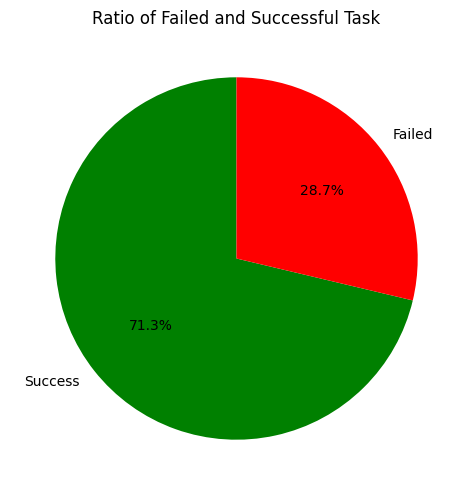

In [55]:
fig, ax = plt.subplots(figsize=(6, 6))
data_dict = df['UserVar.taskStatusLabel'].value_counts().to_dict()
ax.pie(data_dict.values(), labels=data_dict.keys(), autopct='%1.1f%%', startangle=90, colors=['green','red'])
ax.set_title('Ratio of Failed and Successful Task')
plt.show()

similar to the pandas profiling result, the amount of fail task is 28.7%

### how much task has service cod? 

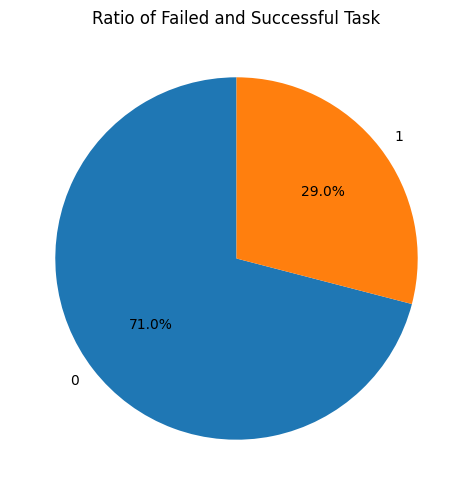

In [56]:
fig, ax = plt.subplots(figsize=(6, 6))
data_dict = df['isCOD'].value_counts().to_dict()
ax.pie(data_dict.values(), labels=data_dict.keys(), autopct='%1.1f%%', startangle=90)
ax.set_title('Ratio of Failed and Successful Task')
plt.show()

here we can see that there more task that does not use COD service than the one that uses

### what are the top problem for a task to fail?

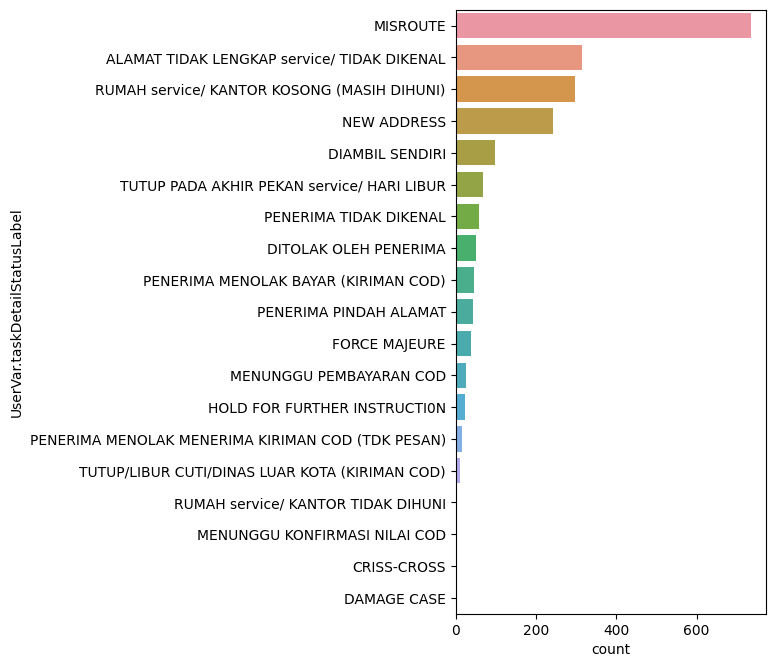

MISROUTE                                             735
ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL          315
RUMAH service/ KANTOR KOSONG (MASIH DIHUNI)          298
NEW ADDRESS                                          243
DIAMBIL SENDIRI                                       99
TUTUP PADA AKHIR PEKAN service/ HARI LIBUR            69
PENERIMA TIDAK DIKENAL                                59
DITOLAK OLEH PENERIMA                                 51
PENERIMA MENOLAK BAYAR (KIRIMAN COD)                  45
PENERIMA PINDAH ALAMAT                                44
FORCE MAJEURE                                         39
MENUNGGU PEMBAYARAN COD                               27
HOLD FOR FURTHER INSTRUCTI0N                          23
PENERIMA MENOLAK MENERIMA KIRIMAN COD (TDK PESAN)     16
TUTUP/LIBUR CUTI/DINAS LUAR KOTA (KIRIMAN COD)        12
RUMAH service/ KANTOR TIDAK DIHUNI                     3
MENUNGGU KONFIRMASI NILAI COD                          2
CRISS-CROSS                    

In [57]:
temp_data = df[df['UserVar.taskStatusLabel'] == 'Failed']
plt.figure(figsize = (4,8))
sns.countplot(data=temp_data, y='UserVar.taskDetailStatusLabel',
              order=temp_data['UserVar.taskDetailStatusLabel'].value_counts().index)
plt.show()
print(temp_data['UserVar.taskDetailStatusLabel'].value_counts())

misroute is the highest problem for a task to be failed, damage case and criss-cross only occurred in one task

### what does the data look like for task that has the shortest and longest time to complete a task?

In [58]:
df[df['timeDiffMinutes'] == df['timeDiffMinutes'].min()].iloc[0]

taskCreatedTime                  2022-11-01 10:20:29+00:00
taskAssignedTo                               amazedSalami5
taskCompletedTime                2022-11-01 10:20:44+00:00
taskStatus                                            done
flow                                              Delivery
taskId                                e3141bde4c71fa66dd02
taskLocationDone.lon                            100.629498
taskLocationDone.lat                             -0.221712
cod.amount                                        238160.0
cod.received                                          True
UserVar.branch_dest                                    PDG
UserVar.taskStatusLabel                            Success
UserVar.receiver_city                 PAYAKUMBUH BARAT, PA
UserVar.taskDetailStatusLabel            YANG BERSANGKUTAN
UserVar.taskDetailStatus                               D01
UserVar.weight                                           1
UserVar.branch_origin                                  C

In [59]:
df[df['timeDiffMinutes'] == df['timeDiffMinutes'].max()].iloc[0]

taskCreatedTime                  2022-11-01 02:32:44+00:00
taskAssignedTo                              pleasedCurlew9
taskCompletedTime                2022-11-01 15:48:44+00:00
taskStatus                                            done
flow                                              Delivery
taskId                                46e9d3f3faa8bfd101c8
taskLocationDone.lon                             98.824918
taskLocationDone.lat                              1.689345
cod.amount                                         40000.0
cod.received                                          True
UserVar.branch_dest                                    DTB
UserVar.taskStatusLabel                            Success
UserVar.receiver_city                 PANDAN,TAPANULI TENG
UserVar.taskDetailStatusLabel            YANG BERSANGKUTAN
UserVar.taskDetailStatus                               D01
UserVar.weight                                           2
UserVar.branch_origin                                  M

### which origin branch to destination branch has the minimal and maximum time to complete the task?

In [60]:
df['branchPath'] = df['UserVar.branch_origin'] + "->" + df['UserVar.branch_dest']

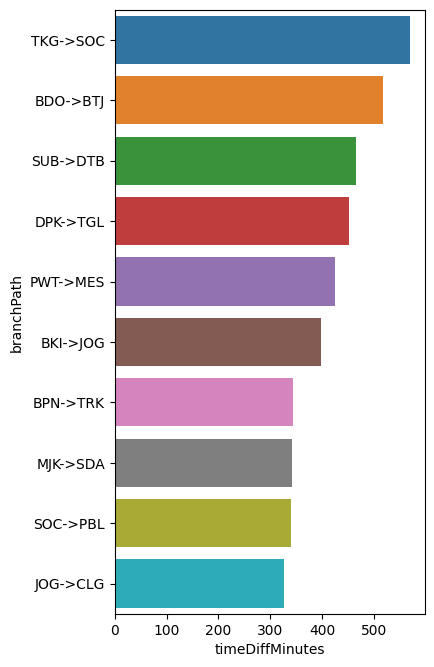

  branchPath  timeDiffMinutes
0   TKG->SOC       569.200000
1   BDO->BTJ       517.016667
2   SUB->DTB       464.466667
3   DPK->TGL       452.133333
4   PWT->MES       424.866667
5   BKI->JOG       398.466667
6   BPN->TRK       344.550000
7   MJK->SDA       341.466667
8   SOC->PBL       339.866667
9   JOG->CLG       325.783333


In [61]:
temp_data = df.groupby('branchPath')['timeDiffMinutes'].mean().nlargest(10).reset_index()

plt.figure(figsize = (4,8))
sns.barplot(data=temp_data, y='branchPath',x='timeDiffMinutes')
plt.show()
print(temp_data)

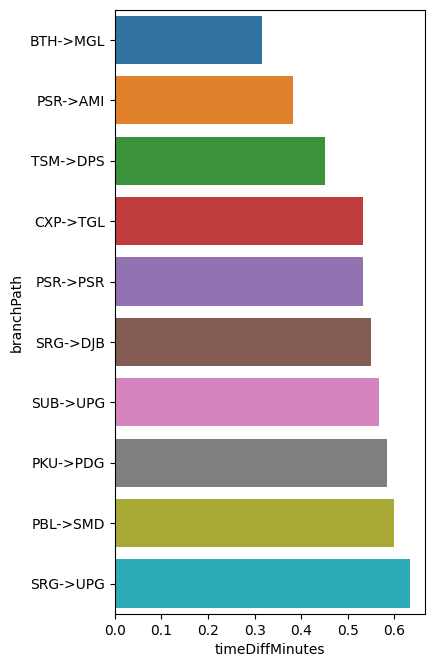

  branchPath  timeDiffMinutes
0   BTH->MGL         0.316667
1   PSR->AMI         0.383333
2   TSM->DPS         0.450000
3   CXP->TGL         0.533333
4   PSR->PSR         0.533333
5   SRG->DJB         0.550000
6   SUB->UPG         0.566667
7   PKU->PDG         0.583333
8   PBL->SMD         0.600000
9   SRG->UPG         0.633333


In [62]:
temp_data = df.groupby('branchPath')['timeDiffMinutes'].mean().nsmallest(10).reset_index()

plt.figure(figsize = (4,8))
sns.barplot(data=temp_data, y='branchPath',x='timeDiffMinutes')
plt.show()
print(temp_data)

in here the time is the average/mean for the path, we can see branch BTH to MGL is the fastest with an average completed time of 0.31~ minutes. The longest is branch TKG to SOC with an average of 569 minutes to complete a task 

### does time to complete task impact the task to fail?

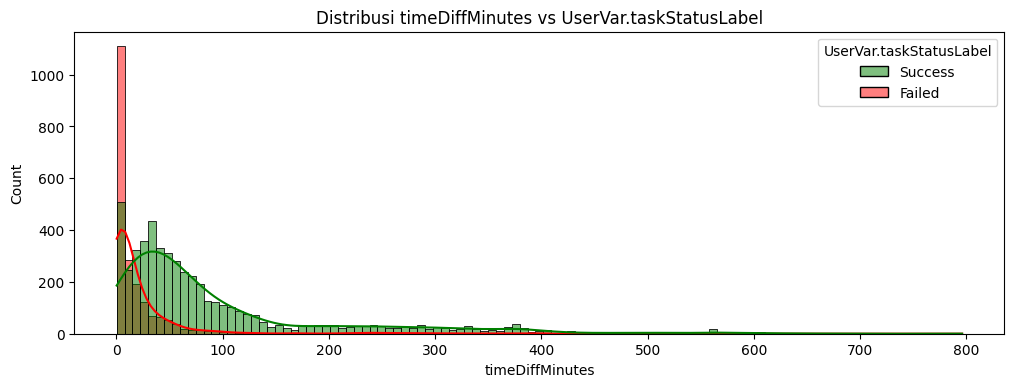

In [63]:
plt.figure(figsize = (12,4))
sns.histplot(x=df['timeDiffMinutes'], hue=df['UserVar.taskStatusLabel'], palette=['green','red'], kde=True)
plt.title("Distribusi timeDiffMinutes vs UserVar.taskStatusLabel")
plt.show()

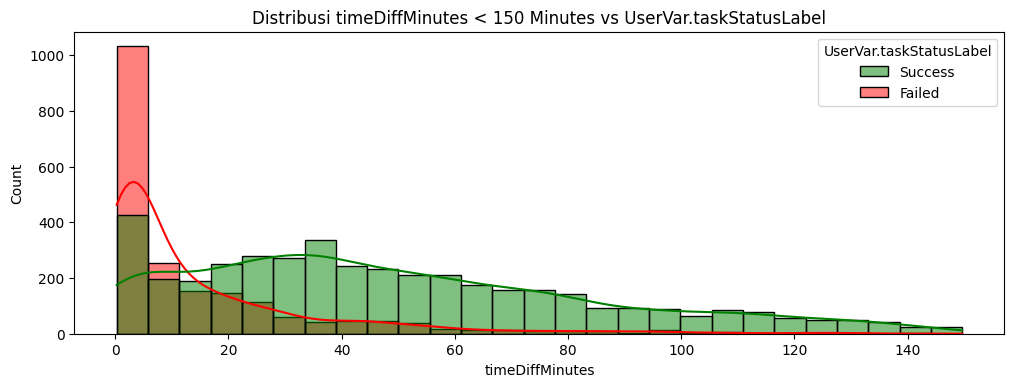

In [64]:
plt.figure(figsize = (12,4))
sns.histplot(x=df['timeDiffMinutes'][df['timeDiffMinutes']<150], hue=df['UserVar.taskStatusLabel'], palette=['green','red'], kde=True)
plt.title("Distribusi timeDiffMinutes < 150 Minutes vs UserVar.taskStatusLabel")
plt.show()

from the chart we can say that a lower time task completion has a higher chance for a task to fail

### which person has to shortest time to completed a task looked by the taskAssignTo column?

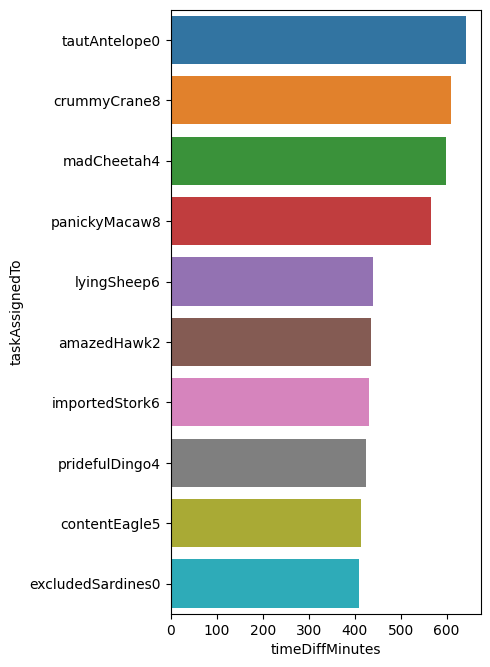

      taskAssignedTo  timeDiffMinutes
0      tautAntelope0       642.138889
1       crummyCrane8       608.688095
2        madCheetah4       598.891667
3      panickyMacaw8       565.061111
4        lyingSheep6       438.816667
5        amazedHawk2       436.526667
6     importedStork6       431.615333
7     pridefulDingo4       423.883333
8      contentEagle5       413.483333
9  excludedSardines0       409.100000


In [65]:
temp_data = df.groupby('taskAssignedTo')['timeDiffMinutes'].mean().nlargest(10).reset_index()

plt.figure(figsize = (4,8))
sns.barplot(data=temp_data, y='taskAssignedTo',x='timeDiffMinutes')
plt.show()
print(temp_data)

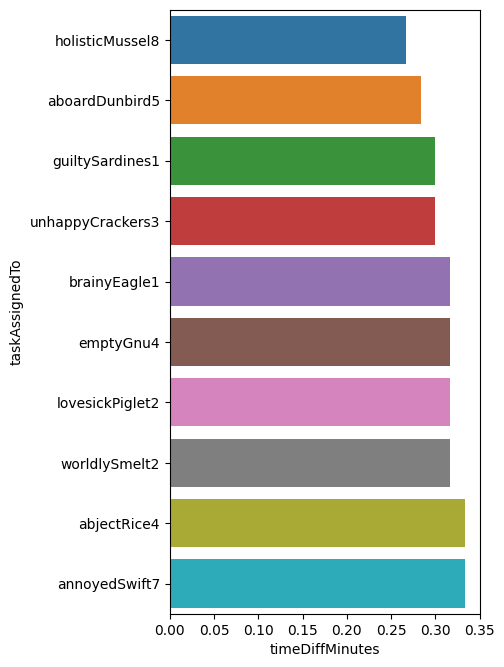

     taskAssignedTo  timeDiffMinutes
0   holisticMussel8         0.266667
1    aboardDunbird5         0.283333
2   guiltySardines1         0.300000
3  unhappyCrackers3         0.300000
4      brainyEagle1         0.316667
5         emptyGnu4         0.316667
6   lovesickPiglet2         0.316667
7     worldlySmelt2         0.316667
8       abjectRice4         0.333333
9     annoyedSwift7         0.333333


In [66]:
temp_data = df.groupby('taskAssignedTo')['timeDiffMinutes'].mean().nsmallest(10).reset_index()

plt.figure(figsize = (4,8))
sns.barplot(data=temp_data, y='taskAssignedTo',x='timeDiffMinutes')
plt.show()
print(temp_data)

tautAntelope0 has the longest average time and holisticMussel8 the shortest

### which person has the most task fail and success to complete a task looked by the taskAssignTo column?

In [67]:
df.columns

Index(['taskCreatedTime', 'taskAssignedTo', 'taskCompletedTime', 'taskStatus',
       'flow', 'taskId', 'taskLocationDone.lon', 'taskLocationDone.lat',
       'cod.amount', 'cod.received', 'UserVar.branch_dest',
       'UserVar.taskStatusLabel', 'UserVar.receiver_city',
       'UserVar.taskDetailStatusLabel', 'UserVar.taskDetailStatus',
       'UserVar.weight', 'UserVar.branch_origin', 'UserVar.taskStatus',
       'timeDiff', 'timeDiffMinutes', 'isCOD', 'branchPath'],
      dtype='object')

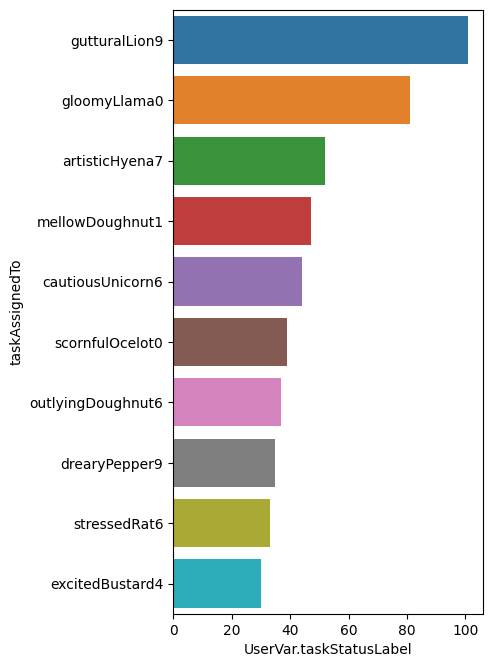

      taskAssignedTo  UserVar.taskStatusLabel
0      gutturalLion9                      101
1       gloomyLlama0                       81
2     artisticHyena7                       52
3    mellowDoughnut1                       47
4   cautiousUnicorn6                       44
5    scornfulOcelot0                       39
6  outlyingDoughnut6                       37
7      drearyPepper9                       35
8       stressedRat6                       33
9    excitedBustard4                       30


In [68]:
temp_data = df[df['UserVar.taskStatusLabel'] == 'Failed'].groupby('taskAssignedTo')['UserVar.taskStatusLabel'].count().nlargest(10).reset_index()

plt.figure(figsize = (4,8))
sns.barplot(data=temp_data, y='taskAssignedTo',x='UserVar.taskStatusLabel')
plt.show()
print(temp_data)

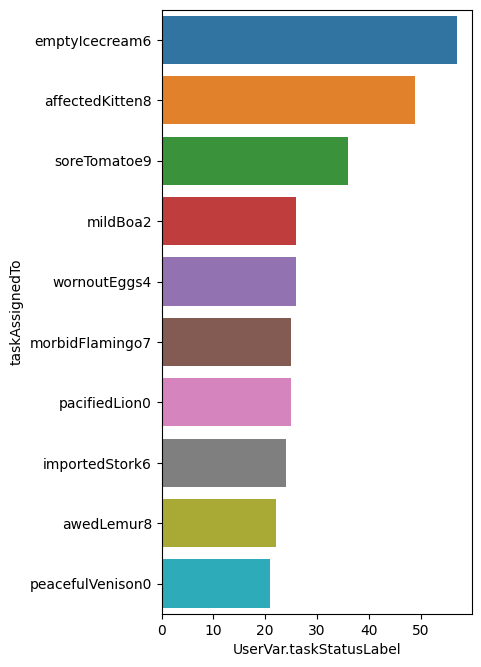

     taskAssignedTo  UserVar.taskStatusLabel
0    emptyIcecream6                       57
1   affectedKitten8                       49
2      soreTomatoe9                       36
3          mildBoa2                       26
4      wornoutEggs4                       26
5   morbidFlamingo7                       25
6     pacifiedLion0                       25
7    importedStork6                       24
8        awedLemur8                       22
9  peacefulVenison0                       21


In [69]:
temp_data = df[df['UserVar.taskStatusLabel'] == 'Success'].groupby('taskAssignedTo')['UserVar.taskStatusLabel'].count().nlargest(10).reset_index()

plt.figure(figsize = (4,8))
sns.barplot(data=temp_data, y='taskAssignedTo',x='UserVar.taskStatusLabel')
plt.show()
print(temp_data)

gutturalLion9 has the some task that failed and emptyIcecream6 has the most task with success

### does cod amount and weight impact the time to complete a task?

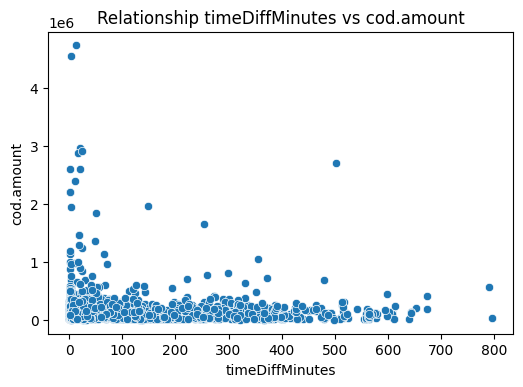

In [70]:
sns.scatterplot(x=df['timeDiffMinutes'], y=df[df['isCOD'] == 1]['cod.amount'])
plt.title("Relationship timeDiffMinutes vs cod.amount")
plt.show()


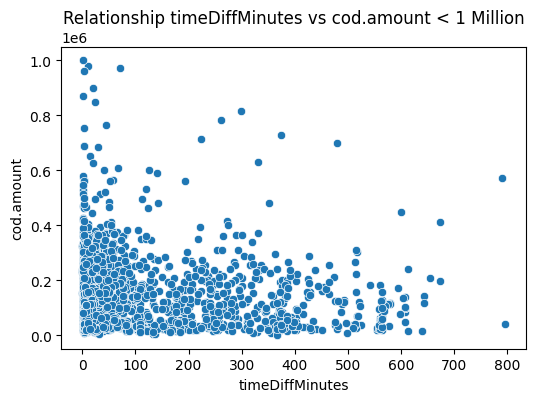

In [71]:
sns.scatterplot(x=df['timeDiffMinutes'], y=df[(df['isCOD'] == 1) &
                                              (df['cod.amount'] < 1_000_000)]['cod.amount'])
plt.title("Relationship timeDiffMinutes vs cod.amount < 1 Million")
plt.show()


for cod.amount it not fully clear, but it seems that a higher cod amount shows to have a shorter time to complete a task

In [72]:
df['UserVar.weight'] = df['UserVar.weight'].astype('float')

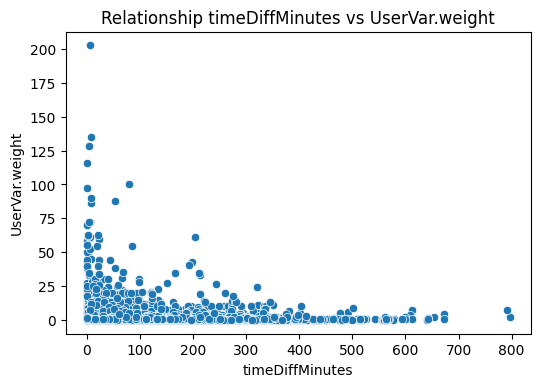

In [73]:
sns.scatterplot(x=df['timeDiffMinutes'], y=df['UserVar.weight'])
plt.title("Relationship timeDiffMinutes vs UserVar.weight")
plt.show()


the same goes for the weight, not fully clear but a higher weight seem to have a shorter time to complete a task

### which receiver city and branch has the most fail task?

In [74]:
df.columns

Index(['taskCreatedTime', 'taskAssignedTo', 'taskCompletedTime', 'taskStatus',
       'flow', 'taskId', 'taskLocationDone.lon', 'taskLocationDone.lat',
       'cod.amount', 'cod.received', 'UserVar.branch_dest',
       'UserVar.taskStatusLabel', 'UserVar.receiver_city',
       'UserVar.taskDetailStatusLabel', 'UserVar.taskDetailStatus',
       'UserVar.weight', 'UserVar.branch_origin', 'UserVar.taskStatus',
       'timeDiff', 'timeDiffMinutes', 'isCOD', 'branchPath'],
      dtype='object')

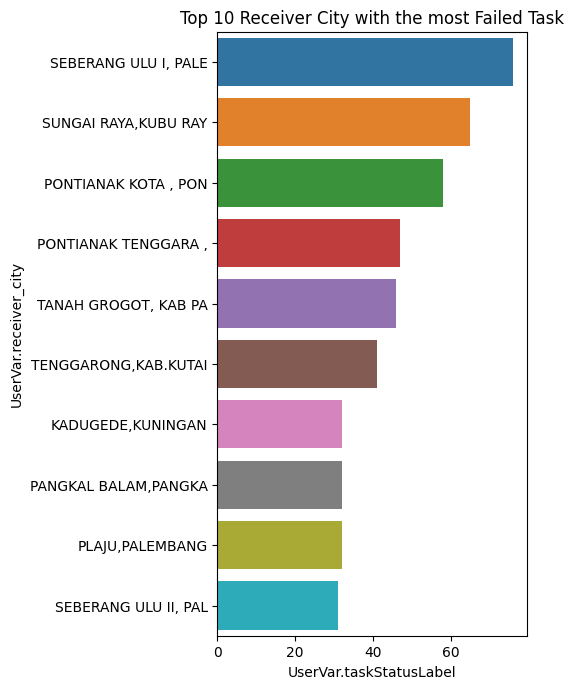

  UserVar.receiver_city  UserVar.taskStatusLabel
0  SEBERANG ULU I, PALE                       76
1  SUNGAI RAYA,KUBU RAY                       65
2  PONTIANAK KOTA , PON                       58
3  PONTIANAK TENGGARA ,                       47
4  TANAH GROGOT, KAB PA                       46
5  TENGGARONG,KAB.KUTAI                       41
6     KADUGEDE,KUNINGAN                       32
7  PANGKAL BALAM,PANGKA                       32
8       PLAJU,PALEMBANG                       32
9  SEBERANG ULU II, PAL                       31


In [75]:
temp_data = df[df['UserVar.taskStatusLabel'] == 'Failed'].groupby('UserVar.receiver_city')['UserVar.taskStatusLabel'].count().nlargest(10).reset_index()

plt.figure(figsize = (4,8))
sns.barplot(data=temp_data, y='UserVar.receiver_city',x='UserVar.taskStatusLabel')
plt.title("Top 10 Receiver City with the most Failed Task")
plt.show()
print(temp_data)

SEBERANG ULU I, PALE has the most failed task

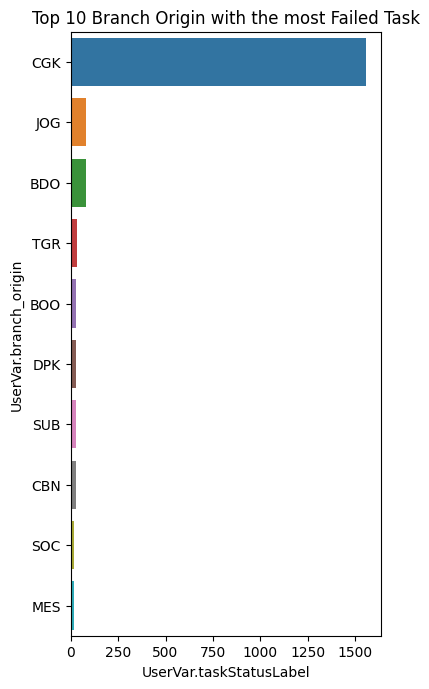

  UserVar.branch_origin  UserVar.taskStatusLabel
0                   CGK                     1556
1                   JOG                       82
2                   BDO                       79
3                   TGR                       31
4                   BOO                       30
5                   DPK                       30
6                   SUB                       30
7                   CBN                       29
8                   SOC                       18
9                   MES                       17


In [76]:
temp_data = df[df['UserVar.taskStatusLabel'] == 'Failed'].groupby('UserVar.branch_origin')['UserVar.taskStatusLabel'].count().nlargest(10).reset_index()

plt.figure(figsize = (4,8))
sns.barplot(data=temp_data, y='UserVar.branch_origin',x='UserVar.taskStatusLabel')
plt.title("Top 10 Branch Origin with the most Failed Task")
plt.show()
print(temp_data)

CGK is possibly in jakarta, the reason it number on 1 on the most failed task is possibly due to jakarta having a denser and demanding population than most branch

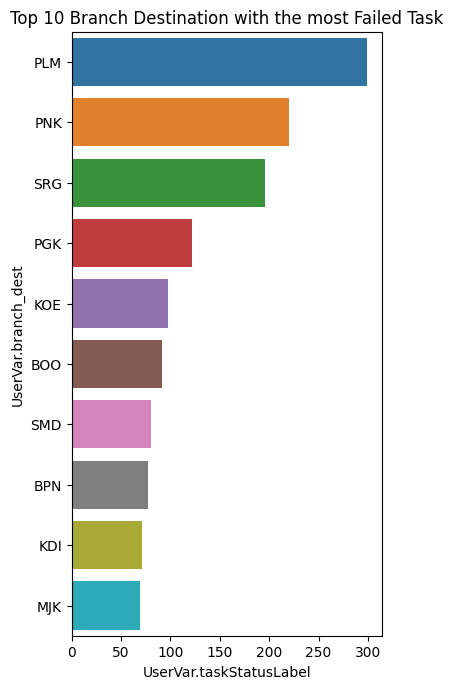

  UserVar.branch_dest  UserVar.taskStatusLabel
0                 PLM                      299
1                 PNK                      220
2                 SRG                      196
3                 PGK                      122
4                 KOE                       98
5                 BOO                       91
6                 SMD                       80
7                 BPN                       77
8                 KDI                       71
9                 MJK                       69


In [77]:
temp_data = df[df['UserVar.taskStatusLabel'] == 'Failed'].groupby('UserVar.branch_dest')['UserVar.taskStatusLabel'].count().nlargest(10).reset_index()

plt.figure(figsize = (4,8))
sns.barplot(data=temp_data, y='UserVar.branch_dest',x='UserVar.taskStatusLabel')
plt.title("Top 10 Branch Destination with the most Failed Task")
plt.show()
print(temp_data)

and the most failed task on branch destination is PLM

# Save Current dataframe

In [78]:
df.to_csv('data/data-sample-extended.csv', index=False)

# Determining Column to use for Machine Learning

the idea of the machine learning model is to predict a time that a certain task will be completed, so if the task is ongoing we should still be able to predict it. Since task that is ongoing have some missing value, hence it better to use features that are not missing on task that is ongoing, the features are here below

In [79]:
df.columns

Index(['taskCreatedTime', 'taskAssignedTo', 'taskCompletedTime', 'taskStatus',
       'flow', 'taskId', 'taskLocationDone.lon', 'taskLocationDone.lat',
       'cod.amount', 'cod.received', 'UserVar.branch_dest',
       'UserVar.taskStatusLabel', 'UserVar.receiver_city',
       'UserVar.taskDetailStatusLabel', 'UserVar.taskDetailStatus',
       'UserVar.weight', 'UserVar.branch_origin', 'UserVar.taskStatus',
       'timeDiff', 'timeDiffMinutes', 'isCOD', 'branchPath'],
      dtype='object')

In [80]:
features_to_be_use = ['taskId','taskCreatedTime', 'taskStatus',
                      'cod.amount', 'UserVar.branch_dest', 'UserVar.receiver_city',
                      'UserVar.weight', 'UserVar.branch_origin', 'isCOD', 'timeDiffMinutes']

In [81]:
df_ml = df[features_to_be_use].copy()
df_ml.head()

,taskId,taskCreatedTime,taskStatus,cod.amount,UserVar.branch_dest,UserVar.receiver_city,UserVar.weight,UserVar.branch_origin,isCOD,timeDiffMinutes
0,4fe3b237c832ca4841a2,2022-11-01 13:17:26+00:00,done,685000.0,SRG,"BATANG ,KAB BATANG",13.000,CGK,1,29.066667
1,08a4da25256affae8446,2022-11-01 01:41:07+00:00,done,53500.0,MGL,"PURWODADI,PURWOREJO",1.300,CGK,1,232.683333
2,2ff0dc469826158b7684,2022-11-01 01:41:07+00:00,done,179500.0,MGL,"PURWODADI,PURWOREJO",3.000,CGK,1,300.833333
3,331c172c2b383f774328,2022-11-01 01:41:07+00:00,done,31815.0,MGL,"PURWODADI,PURWOREJO",0.625,CGK,1,577.200000
4,a9d53fa96c80baee8b23,2022-11-01 01:41:07+00:00,done,144562.0,MGL,"BAGELEN,PURWOREJO",3.000,CGK,1,130.700000


In [82]:
df_ml = pd.concat([df_ml[df_ml['taskStatus'] == 'done'].dropna(), df_ml[df_ml['taskStatus'] == 'ongoing']])

In [83]:
df_ml.isna().sum()

taskId                     0
taskCreatedTime            0
taskStatus                 0
cod.amount                 0
UserVar.branch_dest        0
UserVar.receiver_city      0
UserVar.weight             0
UserVar.branch_origin      0
isCOD                      0
timeDiffMinutes          742
dtype: int64

after we select and make sure there no missing value, we save the data as a csv and moving on to the preprocessing step in the next notebook

In [84]:
df_ml.to_csv('data/data-ml-nonpreprocess.csv', index=False)